# Analyse de Fréquences de Mots

Objectif: Analyser les mots les plus fréquents globalement et par note (1-5 étoiles) pour comprendre le vocabulaire du corpus.

Partie de la story **SAE-80**.

In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

# Add src to path
sys.path.append(os.path.abspath(os.path.join('../..', 'src')))

## Chargement des Données

In [2]:
preprocessed_path = '../../outputs/reviews_preprocessed.pkl'

if os.path.exists(preprocessed_path):
    print(f"Loading data from {preprocessed_path}...")
    reviews = pd.read_pickle(preprocessed_path)
    print(f"Loaded {len(reviews)} reviews.")
else:
    print("Error: Preprocessed data not found. Please run SAE-74 notebook first.")
    # Dummy data
    reviews = pd.DataFrame({
        'tokens_final': [['good', 'food'], ['bad', 'service'], ['amazing', 'place'], ['terrible', 'food']],
        'stars': [5, 1, 5, 1]
    })

Loading data from ../../outputs/reviews_preprocessed.pkl...
Loaded 2000 reviews.


## Fréquences Globales

In [3]:
# Flatten all tokens
all_tokens = [token for tokens in reviews['tokens_final'] for token in tokens]
word_counts = Counter(all_tokens)

print(f"Total words: {len(all_tokens)}")
print(f"Unique words: {len(word_counts)}")

print("\n=== Top 20 Mots Globaux ===")
for word, count in word_counts.most_common(20):
    print(f"{word:<15} : {count}")

Total words: 107126
Unique words: 11390

=== Top 20 Mots Globaux ===
not             : 1274
food            : 1002
good            : 969
place           : 955
great           : 869
time            : 798
service         : 720
get             : 647
like            : 609
back            : 598
one             : 594
would           : 570
go              : 525
really          : 472
no              : 454
also            : 444
u               : 410
got             : 403
dont            : 371
even            : 352


## Mots Distinctifs par Rating

In [4]:
def get_tokens_by_rating(rating):
    tokens_list = reviews[reviews['stars'] == rating]['tokens_final']
    return [token for tokens in tokens_list for token in tokens]

tokens_1 = get_tokens_by_rating(1)
tokens_5 = get_tokens_by_rating(5)

counts_1 = Counter(tokens_1)
counts_5 = Counter(tokens_5)

print("\n=== Top 10 Mots - 1 Étoile ===")
for word, count in counts_1.most_common(10):
    print(f"{word:<15} : {count}")

print("\n=== Top 10 Mots - 5 Étoiles ===")
for word, count in counts_5.most_common(10):
    print(f"{word:<15} : {count}")


=== Top 10 Mots - 1 Étoile ===
not             : 392
no              : 183
would           : 179
time            : 164
service         : 161
get             : 150
one             : 143
u               : 143
back            : 142
place           : 139

=== Top 10 Mots - 5 Étoiles ===
great           : 533
place           : 419
food            : 380
good            : 356
time            : 307
service         : 295
not             : 294
get             : 238
back            : 228
best            : 214


In [5]:
# Mots distinctifs (ratio)
# On prend les mots qui apparaissent au moins 50 fois dans les 5 étoiles
distinctive_5 = []
for word, count_5 in counts_5.items():
    if count_5 > 50:
        count_1 = counts_1.get(word, 0)
        # Smoothing (+1) pour éviter division par zéro
        ratio = count_5 / (count_1 + 1)
        distinctive_5.append((word, ratio))

distinctive_5.sort(key=lambda x: x[1], reverse=True)

print("\n=== Mots Distinctifs 5 Étoiles (Ratio 5★/1★) ===")
for word, ratio in distinctive_5[:15]:
    print(f"{word:<15} : {ratio:.2f}x plus fréquent")


=== Mots Distinctifs 5 Étoiles (Ratio 5★/1★) ===
fantastic       : 63.00x plus fréquent
amazing         : 40.80x plus fréquent
excellent       : 36.00x plus fréquent
delicious       : 32.00x plus fréquent
selection       : 30.50x plus fréquent
perfect         : 29.50x plus fréquent
atmosphere      : 28.50x plus fréquent
loved           : 26.00x plus fréquent
friendly        : 25.17x plus fréquent
awesome         : 22.75x plus fréquent
love            : 18.10x plus fréquent
great           : 17.77x plus fréquent
sweet           : 17.00x plus fréquent
highly          : 16.00x plus fréquent
favorite        : 15.86x plus fréquent


## WordClouds

Figure saved to ../../outputs/figures\wordclouds-by-rating.png


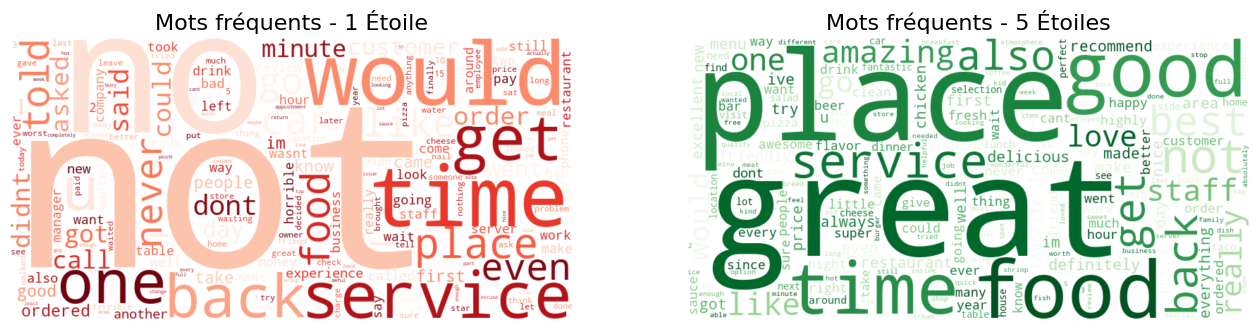

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 1 Star WordCloud
wc_1 = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(counts_1)
axes[0].imshow(wc_1, interpolation='bilinear')
axes[0].set_title('Mots fréquents - 1 Étoile', fontsize=16)
axes[0].axis('off')

# 5 Stars WordCloud
wc_5 = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate_from_frequencies(counts_5)
axes[1].imshow(wc_5, interpolation='bilinear')
axes[1].set_title('Mots fréquents - 5 Étoiles', fontsize=16)
axes[1].axis('off')

# Save
output_dir = '../../outputs/figures'
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, 'wordclouds-by-rating.png')
plt.savefig(output_path, dpi=150, bbox_inches='tight')
print(f"Figure saved to {output_path}")

plt.show()